# Coeficiente de Gini

O coeficiente de Gini ou Índice de Gini mede a concentração de renda de um país, por exemplo, é muito utilizado para compreender o quão desigual está um país em relação a distribuição de renda de seus habitantes. A escala do índice de gini é de 0 à 1, sendo que quanto mais próximo de 1, mais desigual é o país ou estado, do contrário quanto mais próximo de 0 mais igual é a distribuição de renda naquele país ou estado. Um país que tem índice de gini baixo indica que seus habitantes possuem a mesma renda, ou seja, não concentração de renda em apenas uma pessoa ou um grupo de pessoas, e isso é muito bom. Do contrário, um índice de gini alto indica que seus habitantes não possuem a mesma renda, ou seja, uma parcela da população possui muito mais dinheiro do que a maioria da população junta, por exemplo.

Abaixo veremos tudo isso com mais detalhes em Python e R.

### Origem do interesse pelo assunto

Me interessei por esse assunto ao ler o livro Estatística: O que é, Para que serve e Como funciona, de Charles Wheelan. No livro o autor traz alguns índices de gini de 2007 disponibilizados pela CIA (Agência de Inteligência Americana), por exemplo o coefciente de gini do Brasil era de 0.54 e do Estados Unidos era de 0.45 naquele ano. Segundo o IBGE, o índice de gini do Brasil em 2024 foi de 0.50, ou seja, tivemos uma queda na desigualdade de renda, já o do Estados Unidos em 2023 foi de 0.41, também ocorreu uma queda.A queda do índice de gini é consequência de ações politicas.

### Aprendendo a calcular o coeficiente de gini pela curva de lorenz

Me interessei tanto pelo  assunto que pesquisei um vídeo no Youtube para compreender como calcular o coeficiente de gini:https://youtu.be/XyyJVfyY1nA?si=rdNDq_Yhgb-tp4cz

Neste vídeo o professor explica o cálculo do coeficiente de gini utilizando a Curva de Lorenz. A Curva de Lorenz é um gráfico que representa a desigualdade de renda. O gráfico é dividido em duas áreas A e B, sendo que a área A é indicativa do quão desigual está aquele país e a área B é a área total, juntas elas formam um triângulo que tem no eixo vertical a proporção acumulada de renda e no eixo horizontal a proporção acumulada da população. A linha reta do gráfico possui 45º e é utilizada para analisar a curva, quanto mais distante da reta, mas desigual é o país ou estado.

### Calculando o Índice de Gini em Python Puro

In [17]:
p_renda = [10, 15, 20, 55] # a proporção de renda é o resultado da renda de cada pessoa dividida pela renda total
altura = 100/len(p_renda) # a altura (distância) é cem dividio pelo tamanho da população, esse valor é importante
soma = 0
p_acumulada = [] # nessa lista irá ficar a proporção acumulada de renda

In [19]:
for p in p_renda:
    soma += p
    p_acumulada.append(soma)

In [20]:
print(p_acumulada)

[10, 25, 45, 100]


### Compreendendo as funções abaixo

1. triângulo: essa função calcula o triângulo menor do gráfico e posteriormente o triângulo maior do gráfico
2. trapezio: essa função calcula todas as demais divisões da área B, todas formam um trapezio, por isso utilizamos a fórmula da área de um trapézio para realizar o cálculo
3. Ao final o resultado dessas funções será determinante para o cálculo do gini

In [21]:
def triangulo(base, altura):
    return (base * altura) / 2

def trapezio (base_menor, base_maior, altura):
    return ((base_menor + base_maior)*altura)/2

In [22]:
t1 = triangulo(altura, p_acumulada[0]) # menor triângulo do gráfico
t2 = triangulo(100, 100) # maior triângulo do gráfico representa em base e altura: 100% cada

### Reproduzindo o cálculo do vídeo

In [27]:
# aplicando a fórmula do trapézio para cada partição da área B, exceto o triângulo que já calculamos
b = 0
a = 0
for i in range(1, len(p_acumulada)):
    b += trapezio(p_acumulada[i], p_acumulada[i - 1], altura)
print(b)

3125.0


In [28]:
# B é o resultado de b 3125 + o resultado do 1º triângulo
B = b + t1 

# A é o resultado do 2º triângulo menos o resultado de B
A = t2 - B

print(B, A)

3250.0 1750.0


### Calculando o índice de gini
Resultado de A (área A) dividido pelo total (área A + área B)

In [29]:
gini = A / (A + B)
print(gini)

0.35


### Curva de Lorenz

A imagem abaixo foi retirada do canal do youtube. Nela podemos ver:

1. A linha de Perfeita Igualdade
2. A área A representando a concentração de renda
3. A área B representando o total
4. O eixo y sendo a proporção acumulada de renda
5. O eixo x sendo a proporção acumulada de pessoas

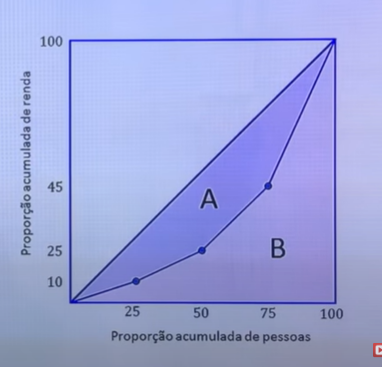

### Calculando o índice de gini em R Puro

In [30]:
!pip install rpy2

In [31]:
import os
os.environ["RPY2_CFFI_MODE"] = "ABI"
%load_ext rpy2.ipython

In [37]:
%%R -i p_renda
distancia <- 100/length(p_renda)
acumula <- 0
print(p_renda)

[1] 10 15 20 55


In [36]:
%%R -i p_acumulada
print(p_acumulada)

[1]  10  25  45 100


In [51]:
%%R
triangulos <- function(base, altura){
    (base * altura)/2
}

trapezios <- function(base_menor, base_maior, altura){
    ((base_menor + base_maior) * altura)/2
}

In [52]:
%%R
t_menor <- triangulos(distancia, p_acumulada[1])
print(t_menor)

[1] 125


In [53]:
%%R
t_maior <- triangulos(100, 100)
print(t_maior)

[1] 5000


In [62]:
%%R
area_b <- 0
area_a <- 0

for (i in 2:4){
    area_b <- area_b + trapezios(p_acumulada[i], p_acumulada[i-1], distancia)
}
print(area_b)

[1] 3125


In [63]:
%%R
area_B <- area_b + t_menor
area_A <- t_maior - area_B

indice_gini <- area_A / (area_A + area_B)
print(indice_gini)

[1] 0.35


## Conclusão

O índice de gini do exemplo dado pelo professor, é de 0.35, é um indice relativamente baixo, o que nos mostra que não é um país desigual em concentração de renda.

As duas linguagens chegaram no mesmo resultado, isso é muito bom.